PATTERN MINING

Before implementing the pattern mining algorithm, some manipulation was done. Since the following lines of code were run on a different notebook, at the beginning a recap of all the cleaning previously performed was necessary. Then, each variables, was "binned": its range was cut into different intervals. 
Several plots were shown, in order to observe the total amoint of rules genereated for different combination of bins, support level, confidence level and the minimum number of rules in an itemset.

In [23]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn import preprocessing
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score

In [5]:
data_classification_m=pd.read_csv("/Users/davidepiccoli/Desktop/data mining/ravdess_dm1_2223/ravdess_features.csv")
missing = data_classification_m['vocal_channel'].isnull()
sc=data_classification_m["vocal_channel"].value_counts("speech")
data_classification_m.loc[missing,'vocal_channel'] = np.random.choice(sc.index, size=len(data_classification_m[missing]),p=sc.values)
missing_actor = data_classification_m['actor'].isnull()
q=data_classification_m["actor"].value_counts("22")
data_classification_m.loc[missing_actor,'actor'] = np.random.choice(q.index, size=len(data_classification_m[missing_actor]),p=q.values)
data_classification_m.set_index('std', inplace=True)
data_classification_m.interpolate(method='index', inplace=True)
data_classification_m.reset_index(inplace=True)
data_classification_m.drop(data_classification_m[data_classification_m['frame_count'] == -1].index, inplace = True)
data_classification_m.drop(data_classification_m[data_classification_m['zero_crossings_sum'] == 30153].index, inplace = True)
data_classification_m.drop(data_classification_m[data_classification_m['std'] > 0.13].index, inplace = True)

In [6]:
column2drop = ["stft_min","sc_min","stft_max","frame_width","frame_count","stft_max","frame_rate","sample_width","modality","actor", "repetition", "channels"]
data_classification_m.drop(column2drop, axis=1, inplace=True)

In [7]:
"""for column in data_classification_m:
    data_classification_m[column].value_counts().plot(kind='bar', title=column)
    plt.show()"""

"for column in data_classification_m:\n    data_classification_m[column].value_counts().plot(kind='bar', title=column)\n    plt.show()"

In [8]:
e = 3
data_classification_m["std_Bin"] = pd.qcut(data_classification_m["std"], e)
data_classification_m["length_ms_Bin"] = pd.qcut(data_classification_m["length_ms"], e)
data_classification_m["intensity_Bin"] = pd.qcut(data_classification_m["intensity"], e)
data_classification_m["zero_crossings_sum_Bin"] = pd.qcut(data_classification_m["zero_crossings_sum"], e)
data_classification_m["mfcc_mean_Bin"] = pd.qcut(data_classification_m["mfcc_mean"], e)
data_classification_m["mfcc_std_Bin"] = pd.qcut(data_classification_m["mfcc_std"], e)
data_classification_m["mfcc_min_Bin"] = pd.qcut(data_classification_m["mfcc_min"], e)
data_classification_m["mfcc_max_Bin"] = pd.qcut(data_classification_m["mfcc_max"], e)
data_classification_m["sc_mean_Bin"] = pd.qcut(data_classification_m["sc_mean"], e)
data_classification_m["sc_std_Bin"] = pd.qcut(data_classification_m["sc_std"], e)
##data_classification_m["sc_min_Bin"] = pd.qcut(data_classification_m["sc_min"], 4)
data_classification_m["sc_max_Bin"] = pd.qcut(data_classification_m["sc_max"], e)
data_classification_m["sc_kur_Bin"] = pd.qcut(data_classification_m["sc_kur"], e)
data_classification_m["sc_skew_Bin"] = pd.qcut(data_classification_m["sc_skew"], e)
data_classification_m["stft_mean_Bin"] = pd.qcut(data_classification_m["stft_mean"], e)
data_classification_m["stft_std_Bin"] = pd.qcut(data_classification_m["stft_std"], e)
##data_classification_m["stft_min_Bin"] = pd.qcut(data_classification_m["stft_min"], 4)
data_classification_m["stft_kur_Bin"] = pd.qcut(data_classification_m["stft_kur"], e)
data_classification_m["stft_skew_Bin"] = pd.qcut(data_classification_m["stft_skew"], e)
data_classification_m["mean_Bin"] = pd.qcut(data_classification_m["mean"], e)
data_classification_m["min_Bin"] = pd.qcut(data_classification_m["min"], e)
data_classification_m["max_Bin"] = pd.qcut(data_classification_m["max"], e)
data_classification_m["kur_Bin"] = pd.qcut(data_classification_m["kur"], e)
data_classification_m["skew_Bin"] = pd.qcut(data_classification_m["skew"], e)


In [9]:
data_classification_m.drop(["std", "length_ms","intensity","zero_crossings_sum","mfcc_mean","mfcc_std","mfcc_min","mfcc_max","sc_mean","sc_std","sc_max","sc_kur",
"sc_skew","stft_mean","stft_std","stft_kur","stft_skew","mean","min","max","kur","skew"], axis=1, inplace=True)

In [10]:
data_classification_m["std_Bin"] = data_classification_m["std_Bin"].astype(str) + "_std"
data_classification_m["length_ms_Bin"] = data_classification_m["length_ms_Bin"].astype(str) + "_length_ms"
data_classification_m["intensity_Bin"] = data_classification_m["intensity_Bin"].astype(str) + "_intensity"
data_classification_m["zero_crossings_sum_Bin"] = data_classification_m["zero_crossings_sum_Bin"].astype(str) + "_zero_crossings_sum"
data_classification_m["mfcc_mean_Bin"] = data_classification_m["mfcc_mean_Bin"].astype(str) + "_mfcc_mean"
data_classification_m["mfcc_std_Bin"] = data_classification_m["mfcc_std_Bin"].astype(str) + "_mfcc_std"
data_classification_m["mfcc_min_Bin"] = data_classification_m["mfcc_min_Bin"].astype(str) + "_mfcc_min"
data_classification_m["mfcc_max_Bin"] = data_classification_m["mfcc_max_Bin"].astype(str) + "_mfcc_max"
data_classification_m["sc_mean_Bin"] = data_classification_m["sc_mean_Bin"].astype(str) + "_sc_mean"
data_classification_m["sc_std_Bin"] = data_classification_m["sc_std_Bin"].astype(str) + "_sc_std"
data_classification_m["sc_max_Bin"] = data_classification_m["sc_max_Bin"].astype(str) + "_sc_max"
data_classification_m["sc_kur_Bin"] = data_classification_m["sc_kur_Bin"].astype(str) + "_sc_kur"
data_classification_m["sc_skew_Bin"] = data_classification_m["sc_skew_Bin"].astype(str) + "_sc_skew"
data_classification_m["stft_mean_Bin"] = data_classification_m["stft_mean_Bin"].astype(str) + "_stft_mean"
data_classification_m["stft_std_Bin"] = data_classification_m["stft_std_Bin"].astype(str) + "_stft_std"
data_classification_m["stft_kur_Bin"] = data_classification_m["stft_kur_Bin"].astype(str) + "_stft_kur"
data_classification_m["stft_skew_Bin"] = data_classification_m["stft_skew_Bin"].astype(str) + "_stft_skew"
data_classification_m["mean_Bin"] = data_classification_m["mean_Bin"].astype(str) + "_mean"
data_classification_m["min_Bin"] = data_classification_m["min_Bin"].astype(str) + "_min"
data_classification_m["max_Bin"] = data_classification_m["max_Bin"].astype(str) + "_max"
data_classification_m["kur_Bin"] = data_classification_m["kur_Bin"].astype(str) + "_kur"
data_classification_m["skew_Bin"] = data_classification_m["skew_Bin"].astype(str) + "_skew"



In [12]:
X3 = data_classification_m.values.tolist()

In [13]:
data_classification_m=pd.read_csv("/Users/davidepiccoli/Desktop/data mining/ravdess_dm1_2223/ravdess_features.csv")
missing = data_classification_m['vocal_channel'].isnull()
sc=data_classification_m["vocal_channel"].value_counts("speech")
data_classification_m.loc[missing,'vocal_channel'] = np.random.choice(sc.index, size=len(data_classification_m[missing]),p=sc.values)
missing_actor = data_classification_m['actor'].isnull()
data_classification_m.loc[missing_actor,'actor'] = np.random.choice(q.index, size=len(data_classification_m[missing_actor]),p=q.values)
data_classification_m.set_index('std', inplace=True)
data_classification_m.interpolate(method='index', inplace=True)
data_classification_m.reset_index(inplace=True)
data_classification_m.drop(data_classification_m[data_classification_m['frame_count'] == -1].index, inplace = True)
data_classification_m.drop(data_classification_m[data_classification_m['zero_crossings_sum'] == 30153].index, inplace = True)
data_classification_m.drop(data_classification_m[data_classification_m['std'] > 0.13].index, inplace = True)

column2drop = ["stft_min","sc_min","stft_max","frame_width","frame_count","stft_max","frame_rate","sample_width","modality","actor", "repetition", "channels"]
data_classification_m.drop(column2drop, axis=1, inplace=True)

e = 4
data_classification_m["std_Bin"] = pd.qcut(data_classification_m["std"], e)
data_classification_m["length_ms_Bin"] = pd.qcut(data_classification_m["length_ms"], e)
data_classification_m["intensity_Bin"] = pd.qcut(data_classification_m["intensity"], e)
data_classification_m["zero_crossings_sum_Bin"] = pd.qcut(data_classification_m["zero_crossings_sum"], e)
data_classification_m["mfcc_mean_Bin"] = pd.qcut(data_classification_m["mfcc_mean"], e)
data_classification_m["mfcc_std_Bin"] = pd.qcut(data_classification_m["mfcc_std"], e)
data_classification_m["mfcc_min_Bin"] = pd.qcut(data_classification_m["mfcc_min"], e)
data_classification_m["mfcc_max_Bin"] = pd.qcut(data_classification_m["mfcc_max"], e)
data_classification_m["sc_mean_Bin"] = pd.qcut(data_classification_m["sc_mean"], e)
data_classification_m["sc_std_Bin"] = pd.qcut(data_classification_m["sc_std"], e)
##data_classification_m["sc_min_Bin"] = pd.qcut(data_classification_m["sc_min"], 4)
data_classification_m["sc_max_Bin"] = pd.qcut(data_classification_m["sc_max"], e)
data_classification_m["sc_kur_Bin"] = pd.qcut(data_classification_m["sc_kur"], e)
data_classification_m["sc_skew_Bin"] = pd.qcut(data_classification_m["sc_skew"], e)
data_classification_m["stft_mean_Bin"] = pd.qcut(data_classification_m["stft_mean"], e)
data_classification_m["stft_std_Bin"] = pd.qcut(data_classification_m["stft_std"], e)
##data_classification_m["stft_min_Bin"] = pd.qcut(data_classification_m["stft_min"], 4)
data_classification_m["stft_kur_Bin"] = pd.qcut(data_classification_m["stft_kur"], e)
data_classification_m["stft_skew_Bin"] = pd.qcut(data_classification_m["stft_skew"], e)
data_classification_m["mean_Bin"] = pd.qcut(data_classification_m["mean"], e)
data_classification_m["min_Bin"] = pd.qcut(data_classification_m["min"], e)
data_classification_m["max_Bin"] = pd.qcut(data_classification_m["max"], e)
data_classification_m["kur_Bin"] = pd.qcut(data_classification_m["kur"], e)
data_classification_m["skew_Bin"] = pd.qcut(data_classification_m["skew"], e)

data_classification_m.drop(["std", "length_ms","intensity","zero_crossings_sum","mfcc_mean","mfcc_std","mfcc_min","mfcc_max","sc_mean","sc_std","sc_max","sc_kur",
"sc_skew","stft_mean","stft_std","stft_kur","stft_skew","mean","min","max","kur","skew"], axis=1, inplace=True)

data_classification_m["std_Bin"] = data_classification_m["std_Bin"].astype(str) + "_std"
data_classification_m["length_ms_Bin"] = data_classification_m["length_ms_Bin"].astype(str) + "_length_ms"
data_classification_m["intensity_Bin"] = data_classification_m["intensity_Bin"].astype(str) + "_intensity"
data_classification_m["zero_crossings_sum_Bin"] = data_classification_m["zero_crossings_sum_Bin"].astype(str) + "_zero_crossings_sum"
data_classification_m["mfcc_mean_Bin"] = data_classification_m["mfcc_mean_Bin"].astype(str) + "_mfcc_mean"
data_classification_m["mfcc_std_Bin"] = data_classification_m["mfcc_std_Bin"].astype(str) + "_mfcc_std"
data_classification_m["mfcc_min_Bin"] = data_classification_m["mfcc_min_Bin"].astype(str) + "_mfcc_min"
data_classification_m["mfcc_max_Bin"] = data_classification_m["mfcc_max_Bin"].astype(str) + "_mfcc_max"
data_classification_m["sc_mean_Bin"] = data_classification_m["sc_mean_Bin"].astype(str) + "_sc_mean"
data_classification_m["sc_std_Bin"] = data_classification_m["sc_std_Bin"].astype(str) + "_sc_std"
data_classification_m["sc_max_Bin"] = data_classification_m["sc_max_Bin"].astype(str) + "_sc_max"
data_classification_m["sc_kur_Bin"] = data_classification_m["sc_kur_Bin"].astype(str) + "_sc_kur"
data_classification_m["sc_skew_Bin"] = data_classification_m["sc_skew_Bin"].astype(str) + "_sc_skew"
data_classification_m["stft_mean_Bin"] = data_classification_m["stft_mean_Bin"].astype(str) + "_stft_mean"
data_classification_m["stft_std_Bin"] = data_classification_m["stft_std_Bin"].astype(str) + "_stft_std"
data_classification_m["stft_kur_Bin"] = data_classification_m["stft_kur_Bin"].astype(str) + "_stft_kur"
data_classification_m["stft_skew_Bin"] = data_classification_m["stft_skew_Bin"].astype(str) + "_stft_skew"
data_classification_m["mean_Bin"] = data_classification_m["mean_Bin"].astype(str) + "_mean"
data_classification_m["min_Bin"] = data_classification_m["min_Bin"].astype(str) + "_min"
data_classification_m["max_Bin"] = data_classification_m["max_Bin"].astype(str) + "_max"
data_classification_m["kur_Bin"] = data_classification_m["kur_Bin"].astype(str) + "_kur"
data_classification_m["skew_Bin"] = data_classification_m["skew_Bin"].astype(str) + "_skew"

X4 = data_classification_m.values.tolist()

In [14]:
data_classification_m=pd.read_csv("/Users/davidepiccoli/Desktop/data mining/ravdess_dm1_2223/ravdess_features.csv")
missing = data_classification_m['vocal_channel'].isnull()
sc=data_classification_m["vocal_channel"].value_counts("speech")
data_classification_m.loc[missing,'vocal_channel'] = np.random.choice(sc.index, size=len(data_classification_m[missing]),p=sc.values)
missing_actor = data_classification_m['actor'].isnull()
data_classification_m.loc[missing_actor,'actor'] = np.random.choice(q.index, size=len(data_classification_m[missing_actor]),p=q.values)
data_classification_m.set_index('std', inplace=True)
data_classification_m.interpolate(method='index', inplace=True)
data_classification_m.reset_index(inplace=True)
data_classification_m.drop(data_classification_m[data_classification_m['frame_count'] == -1].index, inplace = True)
data_classification_m.drop(data_classification_m[data_classification_m['zero_crossings_sum'] == 30153].index, inplace = True)
data_classification_m.drop(data_classification_m[data_classification_m['std'] > 0.13].index, inplace = True)

column2drop = ["stft_min","sc_min","stft_max","frame_width","frame_count","stft_max","frame_rate","sample_width","modality","actor", "repetition", "channels"]
data_classification_m.drop(column2drop, axis=1, inplace=True)

e = 5
data_classification_m["std_Bin"] = pd.qcut(data_classification_m["std"], e)
data_classification_m["length_ms_Bin"] = pd.qcut(data_classification_m["length_ms"], e)
data_classification_m["intensity_Bin"] = pd.qcut(data_classification_m["intensity"], e)
data_classification_m["zero_crossings_sum_Bin"] = pd.qcut(data_classification_m["zero_crossings_sum"], e)
data_classification_m["mfcc_mean_Bin"] = pd.qcut(data_classification_m["mfcc_mean"], e)
data_classification_m["mfcc_std_Bin"] = pd.qcut(data_classification_m["mfcc_std"], e)
data_classification_m["mfcc_min_Bin"] = pd.qcut(data_classification_m["mfcc_min"], e)
data_classification_m["mfcc_max_Bin"] = pd.qcut(data_classification_m["mfcc_max"], e)
data_classification_m["sc_mean_Bin"] = pd.qcut(data_classification_m["sc_mean"], e)
data_classification_m["sc_std_Bin"] = pd.qcut(data_classification_m["sc_std"], e)
##data_classification_m["sc_min_Bin"] = pd.qcut(data_classification_m["sc_min"], 4)
data_classification_m["sc_max_Bin"] = pd.qcut(data_classification_m["sc_max"], e)
data_classification_m["sc_kur_Bin"] = pd.qcut(data_classification_m["sc_kur"], e)
data_classification_m["sc_skew_Bin"] = pd.qcut(data_classification_m["sc_skew"], e)
data_classification_m["stft_mean_Bin"] = pd.qcut(data_classification_m["stft_mean"], e)
data_classification_m["stft_std_Bin"] = pd.qcut(data_classification_m["stft_std"], e)
##data_classification_m["stft_min_Bin"] = pd.qcut(data_classification_m["stft_min"], 4)
data_classification_m["stft_kur_Bin"] = pd.qcut(data_classification_m["stft_kur"], e)
data_classification_m["stft_skew_Bin"] = pd.qcut(data_classification_m["stft_skew"], e)
data_classification_m["mean_Bin"] = pd.qcut(data_classification_m["mean"], e)
data_classification_m["min_Bin"] = pd.qcut(data_classification_m["min"], e)
data_classification_m["max_Bin"] = pd.qcut(data_classification_m["max"], e)
data_classification_m["kur_Bin"] = pd.qcut(data_classification_m["kur"], e)
data_classification_m["skew_Bin"] = pd.qcut(data_classification_m["skew"], e)

data_classification_m.drop(["std", "length_ms","intensity","zero_crossings_sum","mfcc_mean","mfcc_std","mfcc_min","mfcc_max","sc_mean","sc_std","sc_max","sc_kur",
"sc_skew","stft_mean","stft_std","stft_kur","stft_skew","mean","min","max","kur","skew"], axis=1, inplace=True)

data_classification_m["std_Bin"] = data_classification_m["std_Bin"].astype(str) + "_std"
data_classification_m["length_ms_Bin"] = data_classification_m["length_ms_Bin"].astype(str) + "_length_ms"
data_classification_m["intensity_Bin"] = data_classification_m["intensity_Bin"].astype(str) + "_intensity"
data_classification_m["zero_crossings_sum_Bin"] = data_classification_m["zero_crossings_sum_Bin"].astype(str) + "_zero_crossings_sum"
data_classification_m["mfcc_mean_Bin"] = data_classification_m["mfcc_mean_Bin"].astype(str) + "_mfcc_mean"
data_classification_m["mfcc_std_Bin"] = data_classification_m["mfcc_std_Bin"].astype(str) + "_mfcc_std"
data_classification_m["mfcc_min_Bin"] = data_classification_m["mfcc_min_Bin"].astype(str) + "_mfcc_min"
data_classification_m["mfcc_max_Bin"] = data_classification_m["mfcc_max_Bin"].astype(str) + "_mfcc_max"
data_classification_m["sc_mean_Bin"] = data_classification_m["sc_mean_Bin"].astype(str) + "_sc_mean"
data_classification_m["sc_std_Bin"] = data_classification_m["sc_std_Bin"].astype(str) + "_sc_std"
data_classification_m["sc_max_Bin"] = data_classification_m["sc_max_Bin"].astype(str) + "_sc_max"
data_classification_m["sc_kur_Bin"] = data_classification_m["sc_kur_Bin"].astype(str) + "_sc_kur"
data_classification_m["sc_skew_Bin"] = data_classification_m["sc_skew_Bin"].astype(str) + "_sc_skew"
data_classification_m["stft_mean_Bin"] = data_classification_m["stft_mean_Bin"].astype(str) + "_stft_mean"
data_classification_m["stft_std_Bin"] = data_classification_m["stft_std_Bin"].astype(str) + "_stft_std"
data_classification_m["stft_kur_Bin"] = data_classification_m["stft_kur_Bin"].astype(str) + "_stft_kur"
data_classification_m["stft_skew_Bin"] = data_classification_m["stft_skew_Bin"].astype(str) + "_stft_skew"
data_classification_m["mean_Bin"] = data_classification_m["mean_Bin"].astype(str) + "_mean"
data_classification_m["min_Bin"] = data_classification_m["min_Bin"].astype(str) + "_min"
data_classification_m["max_Bin"] = data_classification_m["max_Bin"].astype(str) + "_max"
data_classification_m["kur_Bin"] = data_classification_m["kur_Bin"].astype(str) + "_kur"
data_classification_m["skew_Bin"] = data_classification_m["skew_Bin"].astype(str) + "_skew"

X5 = data_classification_m.values.tolist()

In [15]:
data_classification_m=pd.read_csv("/Users/davidepiccoli/Desktop/data mining/ravdess_dm1_2223/ravdess_features.csv")
missing = data_classification_m['vocal_channel'].isnull()
sc=data_classification_m["vocal_channel"].value_counts("speech")
data_classification_m.loc[missing,'vocal_channel'] = np.random.choice(sc.index, size=len(data_classification_m[missing]),p=sc.values)
missing_actor = data_classification_m['actor'].isnull()
data_classification_m.loc[missing_actor,'actor'] = np.random.choice(q.index, size=len(data_classification_m[missing_actor]),p=q.values)
data_classification_m.set_index('std', inplace=True)
data_classification_m.interpolate(method='index', inplace=True)
data_classification_m.reset_index(inplace=True)
data_classification_m.drop(data_classification_m[data_classification_m['frame_count'] == -1].index, inplace = True)
data_classification_m.drop(data_classification_m[data_classification_m['zero_crossings_sum'] == 30153].index, inplace = True)
data_classification_m.drop(data_classification_m[data_classification_m['std'] > 0.13].index, inplace = True)

column2drop = ["stft_min","sc_min","stft_max","frame_width","frame_count","stft_max","frame_rate","sample_width","modality","actor", "repetition", "channels"]
data_classification_m.drop(column2drop, axis=1, inplace=True)

e = 6
data_classification_m["std_Bin"] = pd.qcut(data_classification_m["std"], e)
data_classification_m["length_ms_Bin"] = pd.qcut(data_classification_m["length_ms"], e)
data_classification_m["intensity_Bin"] = pd.qcut(data_classification_m["intensity"], e)
data_classification_m["zero_crossings_sum_Bin"] = pd.qcut(data_classification_m["zero_crossings_sum"], e)
data_classification_m["mfcc_mean_Bin"] = pd.qcut(data_classification_m["mfcc_mean"], e)
data_classification_m["mfcc_std_Bin"] = pd.qcut(data_classification_m["mfcc_std"], e)
data_classification_m["mfcc_min_Bin"] = pd.qcut(data_classification_m["mfcc_min"], e)
data_classification_m["mfcc_max_Bin"] = pd.qcut(data_classification_m["mfcc_max"], e)
data_classification_m["sc_mean_Bin"] = pd.qcut(data_classification_m["sc_mean"], e)
data_classification_m["sc_std_Bin"] = pd.qcut(data_classification_m["sc_std"], e)
##data_classification_m["sc_min_Bin"] = pd.qcut(data_classification_m["sc_min"], 4)
data_classification_m["sc_max_Bin"] = pd.qcut(data_classification_m["sc_max"], e)
data_classification_m["sc_kur_Bin"] = pd.qcut(data_classification_m["sc_kur"], e)
data_classification_m["sc_skew_Bin"] = pd.qcut(data_classification_m["sc_skew"], e)
data_classification_m["stft_mean_Bin"] = pd.qcut(data_classification_m["stft_mean"], e)
data_classification_m["stft_std_Bin"] = pd.qcut(data_classification_m["stft_std"], e)
##data_classification_m["stft_min_Bin"] = pd.qcut(data_classification_m["stft_min"], 4)
data_classification_m["stft_kur_Bin"] = pd.qcut(data_classification_m["stft_kur"], e)
data_classification_m["stft_skew_Bin"] = pd.qcut(data_classification_m["stft_skew"], e)
data_classification_m["mean_Bin"] = pd.qcut(data_classification_m["mean"], e)
data_classification_m["min_Bin"] = pd.qcut(data_classification_m["min"], e)
data_classification_m["max_Bin"] = pd.qcut(data_classification_m["max"], e)
data_classification_m["kur_Bin"] = pd.qcut(data_classification_m["kur"], e)
data_classification_m["skew_Bin"] = pd.qcut(data_classification_m["skew"], e)

data_classification_m.drop(["std", "length_ms","intensity","zero_crossings_sum","mfcc_mean","mfcc_std","mfcc_min","mfcc_max","sc_mean","sc_std","sc_max","sc_kur",
"sc_skew","stft_mean","stft_std","stft_kur","stft_skew","mean","min","max","kur","skew"], axis=1, inplace=True)

data_classification_m["std_Bin"] = data_classification_m["std_Bin"].astype(str) + "_std"
data_classification_m["length_ms_Bin"] = data_classification_m["length_ms_Bin"].astype(str) + "_length_ms"
data_classification_m["intensity_Bin"] = data_classification_m["intensity_Bin"].astype(str) + "_intensity"
data_classification_m["zero_crossings_sum_Bin"] = data_classification_m["zero_crossings_sum_Bin"].astype(str) + "_zero_crossings_sum"
data_classification_m["mfcc_mean_Bin"] = data_classification_m["mfcc_mean_Bin"].astype(str) + "_mfcc_mean"
data_classification_m["mfcc_std_Bin"] = data_classification_m["mfcc_std_Bin"].astype(str) + "_mfcc_std"
data_classification_m["mfcc_min_Bin"] = data_classification_m["mfcc_min_Bin"].astype(str) + "_mfcc_min"
data_classification_m["mfcc_max_Bin"] = data_classification_m["mfcc_max_Bin"].astype(str) + "_mfcc_max"
data_classification_m["sc_mean_Bin"] = data_classification_m["sc_mean_Bin"].astype(str) + "_sc_mean"
data_classification_m["sc_std_Bin"] = data_classification_m["sc_std_Bin"].astype(str) + "_sc_std"
data_classification_m["sc_max_Bin"] = data_classification_m["sc_max_Bin"].astype(str) + "_sc_max"
data_classification_m["sc_kur_Bin"] = data_classification_m["sc_kur_Bin"].astype(str) + "_sc_kur"
data_classification_m["sc_skew_Bin"] = data_classification_m["sc_skew_Bin"].astype(str) + "_sc_skew"
data_classification_m["stft_mean_Bin"] = data_classification_m["stft_mean_Bin"].astype(str) + "_stft_mean"
data_classification_m["stft_std_Bin"] = data_classification_m["stft_std_Bin"].astype(str) + "_stft_std"
data_classification_m["stft_kur_Bin"] = data_classification_m["stft_kur_Bin"].astype(str) + "_stft_kur"
data_classification_m["stft_skew_Bin"] = data_classification_m["stft_skew_Bin"].astype(str) + "_stft_skew"
data_classification_m["mean_Bin"] = data_classification_m["mean_Bin"].astype(str) + "_mean"
data_classification_m["min_Bin"] = data_classification_m["min_Bin"].astype(str) + "_min"
data_classification_m["max_Bin"] = data_classification_m["max_Bin"].astype(str) + "_max"
data_classification_m["kur_Bin"] = data_classification_m["kur_Bin"].astype(str) + "_kur"
data_classification_m["skew_Bin"] = data_classification_m["skew_Bin"].astype(str) + "_skew"

X6 = data_classification_m.values.tolist()

In [16]:
#!pip install pyfim
from fim import apriori

In [17]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)

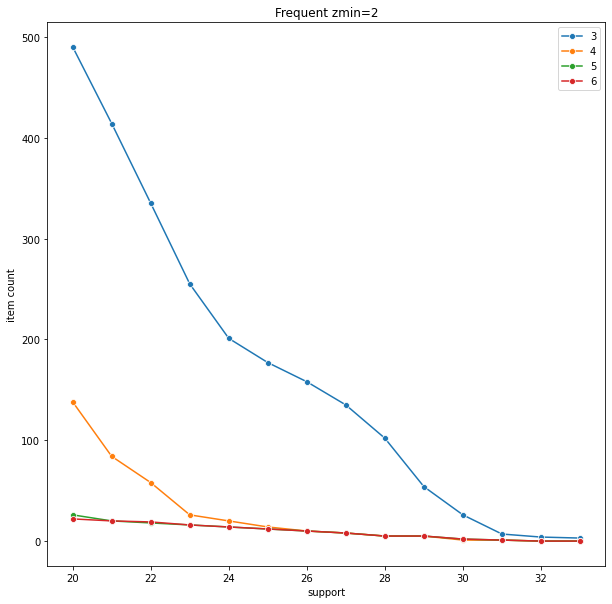

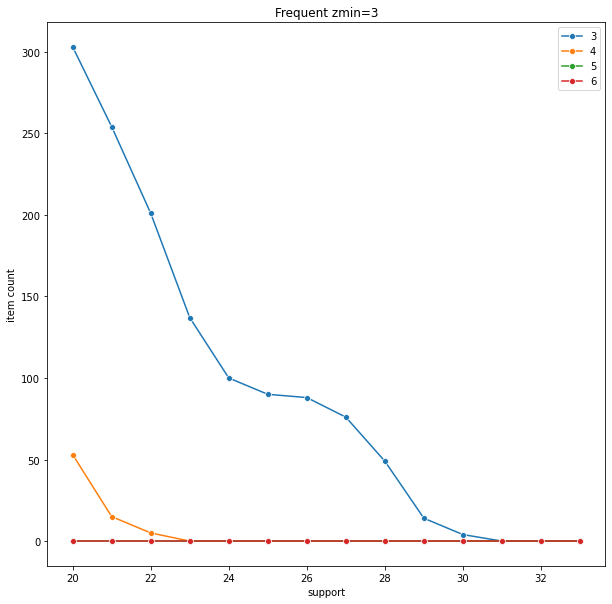

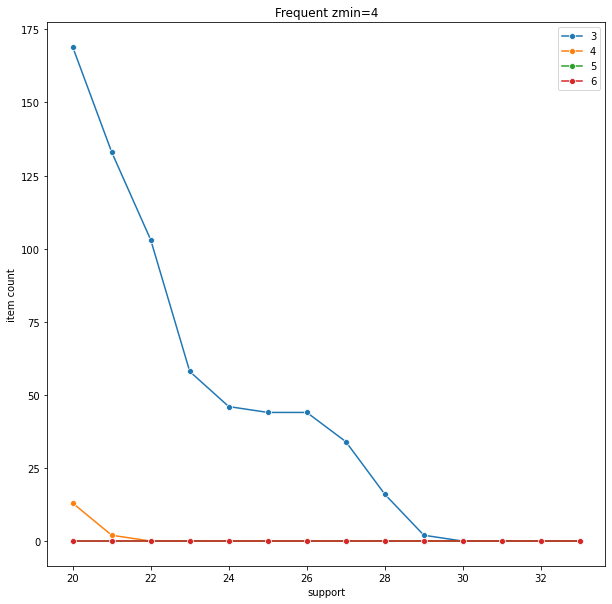

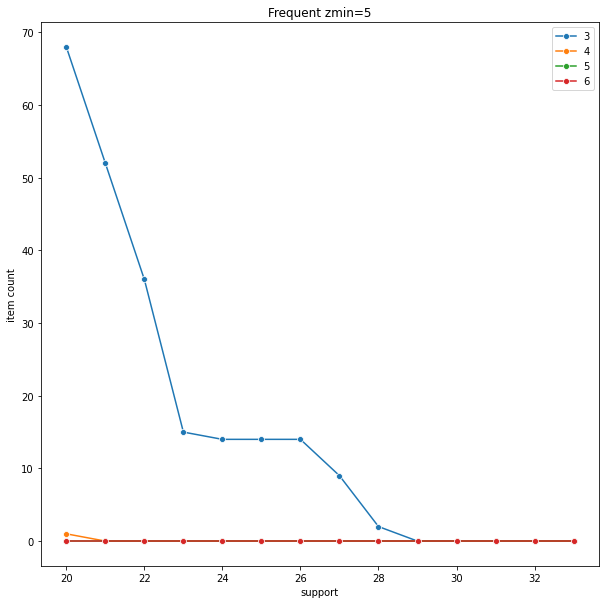

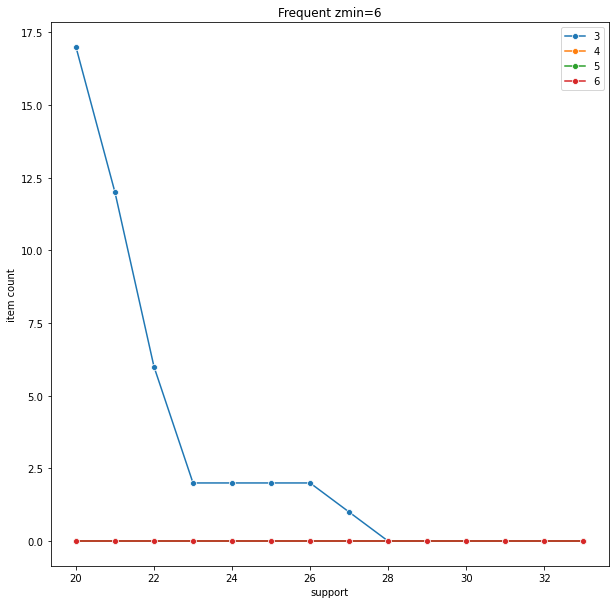

In [18]:
for zmin in range(2,7):
    list_x_3 = []
    list_y_3 = []
    list_x_4 = []
    list_y_4 = []
    list_x_5 = []
    list_y_5 = []
    list_x_6 = []
    list_y_6 = []

    for i in range (20, 34):    
        supp = i 
        list_x_3.append(i)
        list_x_4.append(i)
        list_x_5.append(i)
        list_x_6.append(i) 
        itemsets = apriori(X3, target="s", supp=supp, zmin=zmin, report="S")
        frequent = pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])
        list_y_3.append(frequent.shape[0])
        itemsets = apriori(X4, target="s", supp=supp, zmin=zmin, report="S")
        frequent = pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])
        list_y_4.append(frequent.shape[0])
        itemsets = apriori(X5, target="s", supp=supp, zmin=zmin, report="S")
        frequent = pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])
        list_y_5.append(frequent.shape[0])
        itemsets = apriori(X6, target="s", supp=supp, zmin=zmin, report="S")
        frequent = pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])
        list_y_6.append(frequent.shape[0])
    plt.figure(figsize=(10, 10),)
    sns.lineplot(x=list_x_3, y=list_y_3,marker='o' )
    sns.lineplot(x=list_x_4, y=list_y_4,marker='o' )
    sns.lineplot(x=list_x_5, y=list_y_5,marker='o' )
    sns.lineplot(x=list_x_6, y=list_y_6,marker='o' )
    plt.title("Frequent zmin={}".format(zmin))
    plt.legend(labels=['3', '4', '5', '6'])
    plt.xlabel("support")
    plt.ylabel("item count")
    plt.show()

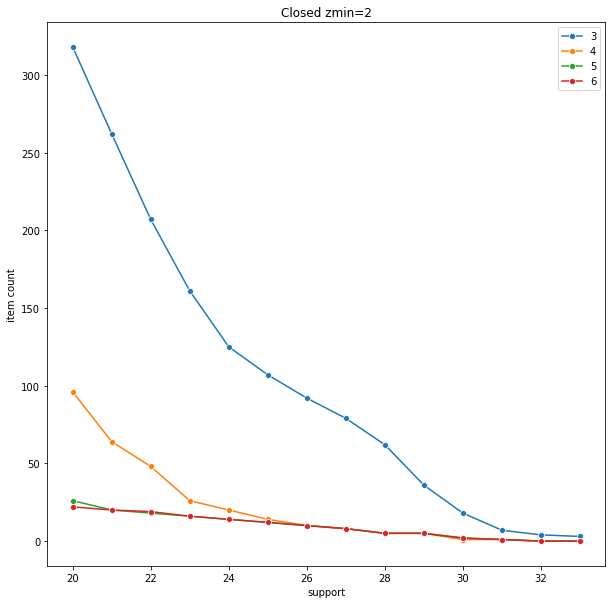

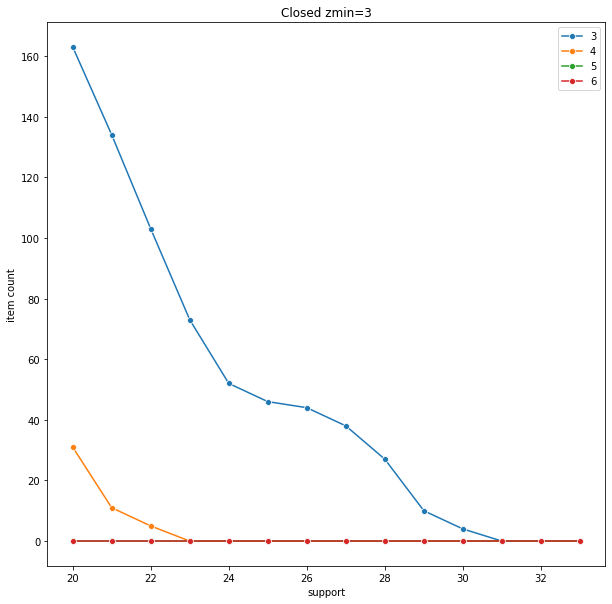

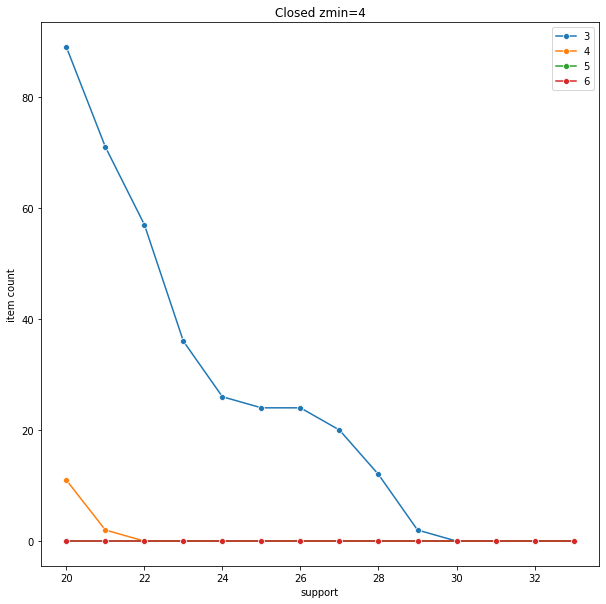

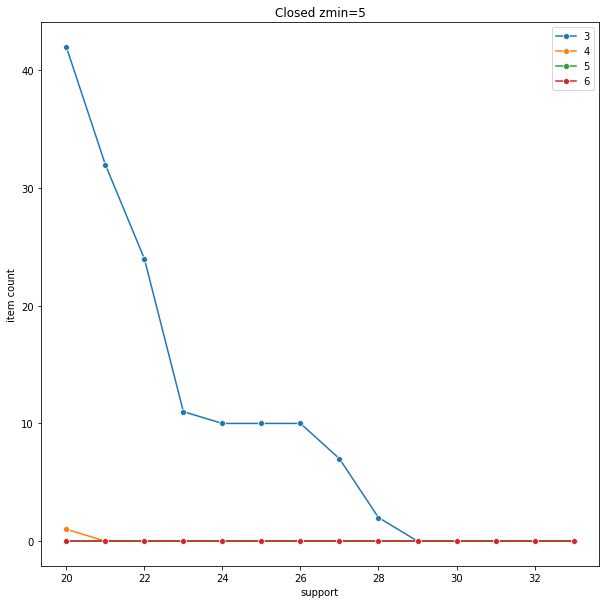

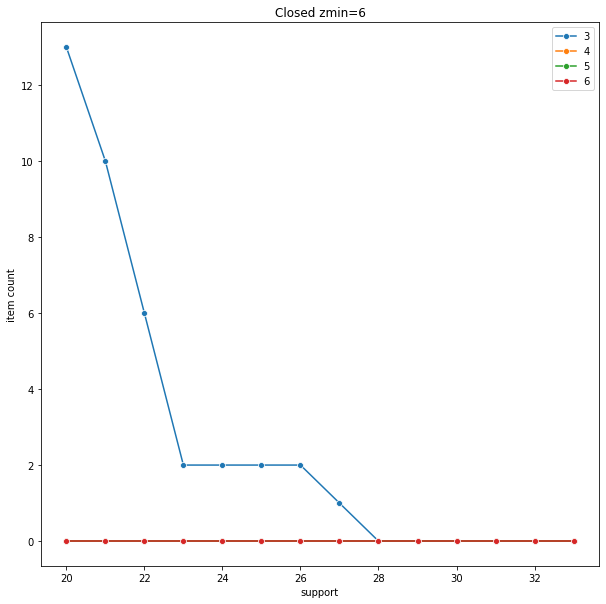

In [19]:
for zmin in range(2,7):
    list_x_3 = []
    list_y_3 = []
    list_x_4 = []
    list_y_4 = []
    list_x_5 = []
    list_y_5 = []
    list_x_6 = []
    list_y_6 = []

    for i in range (20, 34):    
        supp = i 
        list_x_3.append(i)
        list_x_4.append(i)
        list_x_5.append(i)
        list_x_6.append(i) 
        itemsets = apriori(X3, target="c", supp=supp, zmin=zmin, report="S")
        frequent = pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])
        list_y_3.append(frequent.shape[0])
        itemsets = apriori(X4, target="c", supp=supp, zmin=zmin, report="S")
        frequent = pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])
        list_y_4.append(frequent.shape[0])
        itemsets = apriori(X5, target="c", supp=supp, zmin=zmin, report="S")
        frequent = pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])
        list_y_5.append(frequent.shape[0])
        itemsets = apriori(X6, target="c", supp=supp, zmin=zmin, report="S")
        frequent = pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])
        list_y_6.append(frequent.shape[0])
    plt.figure(figsize=(10, 10),)
    sns.lineplot(x=list_x_3, y=list_y_3,marker='o' )
    sns.lineplot(x=list_x_4, y=list_y_4,marker='o' )
    sns.lineplot(x=list_x_5, y=list_y_5,marker='o' )
    sns.lineplot(x=list_x_6, y=list_y_6,marker='o' )
    plt.title("Closed zmin={}".format(zmin))
    plt.legend(labels=['3', '4', '5', '6'])
    plt.xlabel("support")
    plt.ylabel("item count")
    plt.show()

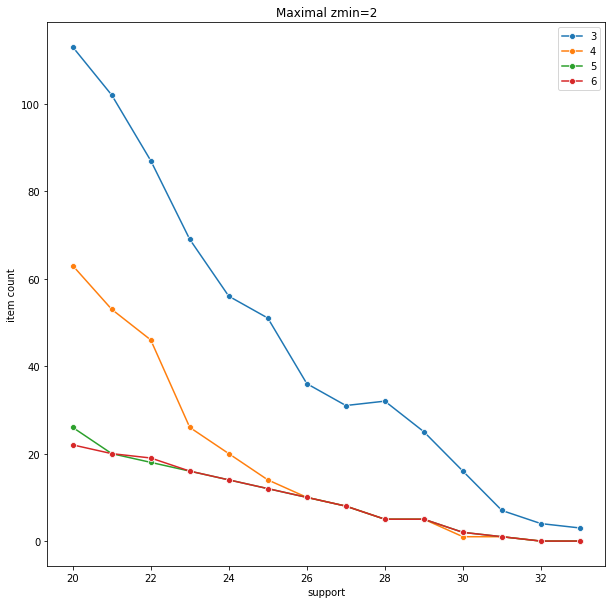

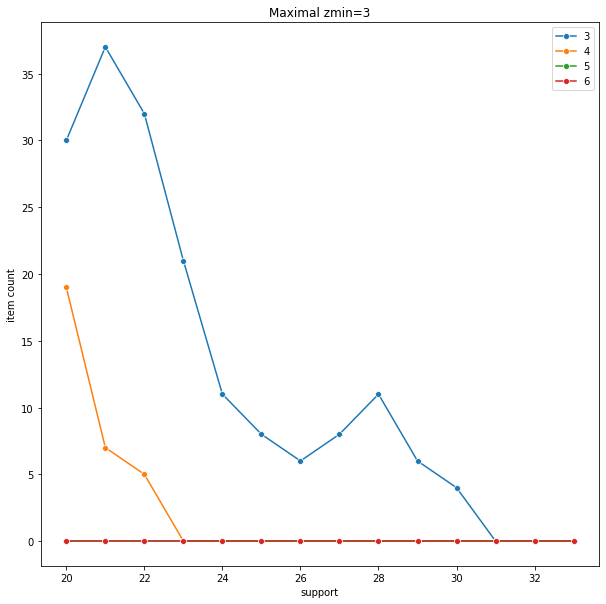

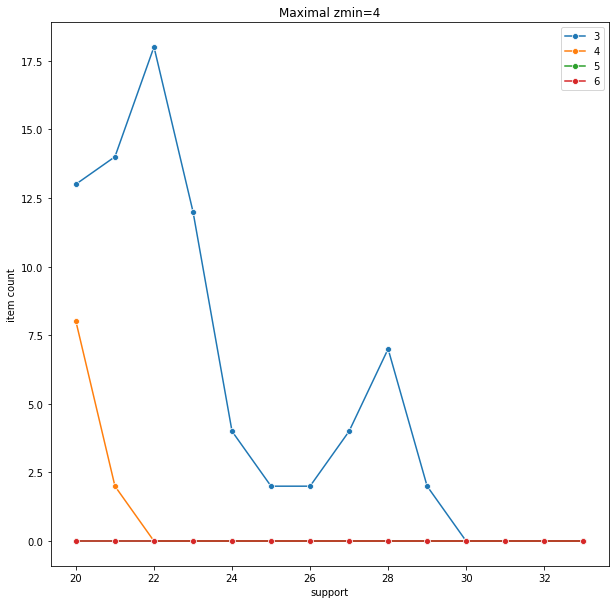

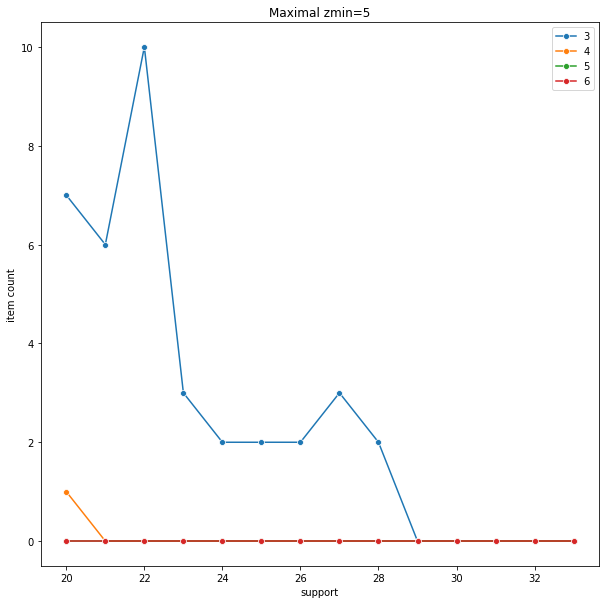

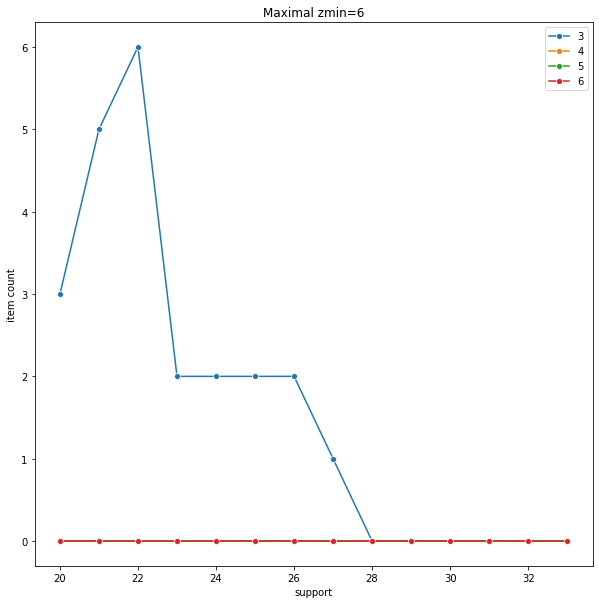

In [20]:
for zmin in range(2,7):
    list_x_3 = []
    list_y_3 = []
    list_x_4 = []
    list_y_4 = []
    list_x_5 = []
    list_y_5 = []
    list_x_6 = []
    list_y_6 = []

    for i in range (20, 34):    
        supp = i 
        list_x_3.append(i)
        list_x_4.append(i)
        list_x_5.append(i)
        list_x_6.append(i) 
        itemsets = apriori(X3, target="m", supp=supp, zmin=zmin, report="S")
        frequent = pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])
        list_y_3.append(frequent.shape[0])
        itemsets = apriori(X4, target="m", supp=supp, zmin=zmin, report="S")
        frequent = pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])
        list_y_4.append(frequent.shape[0])
        itemsets = apriori(X5, target="m", supp=supp, zmin=zmin, report="S")
        frequent = pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])
        list_y_5.append(frequent.shape[0])
        itemsets = apriori(X6, target="m", supp=supp, zmin=zmin, report="S")
        frequent = pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])
        list_y_6.append(frequent.shape[0])
    plt.figure(figsize=(10, 10),)
    sns.lineplot(x=list_x_3, y=list_y_3,marker='o' )
    sns.lineplot(x=list_x_4, y=list_y_4,marker='o' )
    sns.lineplot(x=list_x_5, y=list_y_5,marker='o' )
    sns.lineplot(x=list_x_6, y=list_y_6,marker='o' )
    plt.title("Maximal zmin={}".format(zmin))
    plt.legend(labels=['3', '4', '5', '6'])
    plt.xlabel("support")
    plt.ylabel("item count")
    plt.show()

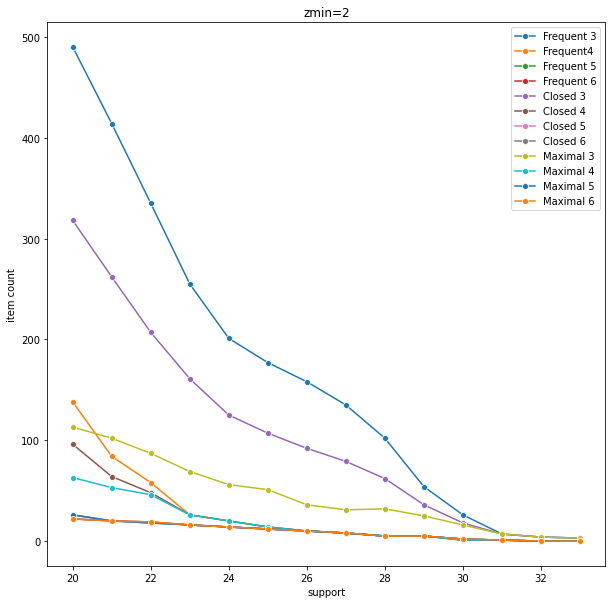

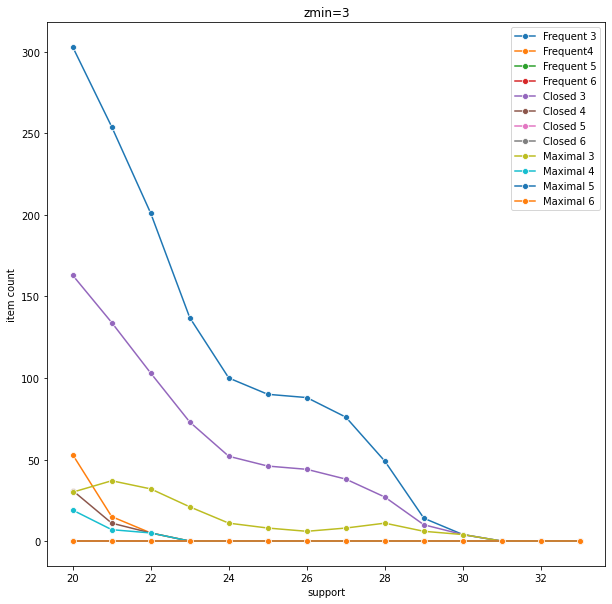

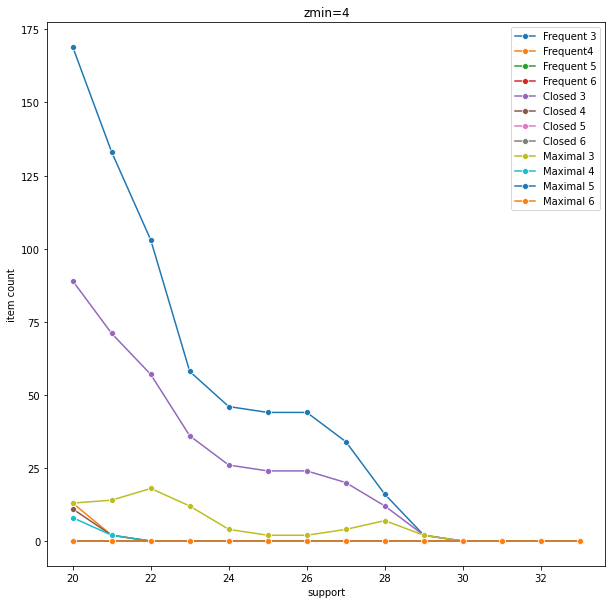

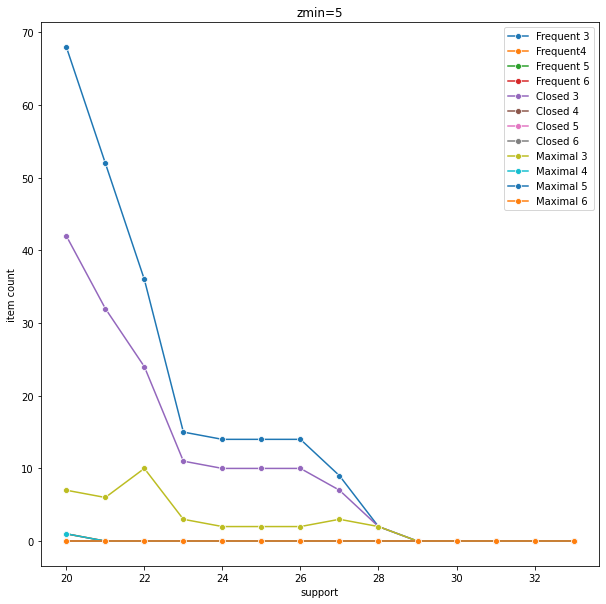

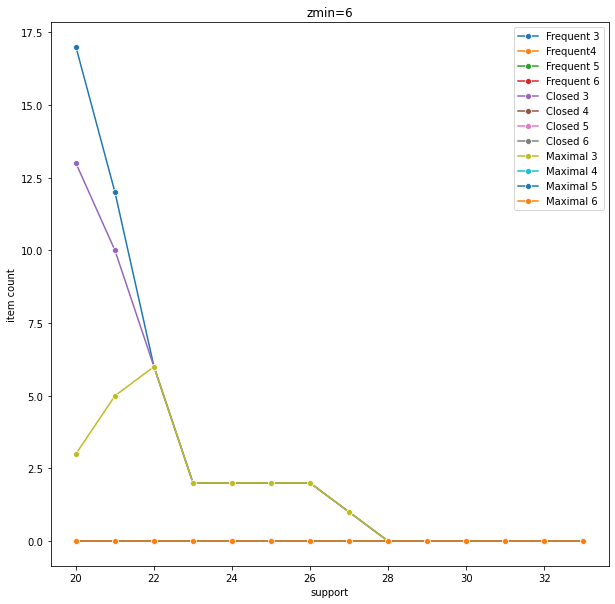

In [21]:
for zmin in range(2,7):
    list_x_3_f = []
    list_y_3_f = []
    list_x_4_f = []
    list_y_4_f = []
    list_x_5_f = []
    list_y_5_f = []
    list_x_6_f = []
    list_y_6_f = []
    list_x_3_c = []
    list_y_3_c = []
    list_x_4_c = []
    list_y_4_c = []
    list_x_5_c = []
    list_y_5_c = []
    list_x_6_c = []
    list_y_6_c = []
    list_x_3_m = []
    list_y_3_m = []
    list_x_4_m = []
    list_y_4_m = []
    list_x_5_m = []
    list_y_5_m = []
    list_x_6_m = []
    list_y_6_m = []

    for i in range (20, 34):    
        supp = i 
        list_x_3_f.append(i)
        list_x_4_f.append(i)
        list_x_5_f.append(i)
        list_x_6_f.append(i)
        list_x_3_c.append(i)
        list_x_4_c.append(i)
        list_x_5_c.append(i)
        list_x_6_c.append(i)
        list_x_3_m.append(i)
        list_x_4_m.append(i)
        list_x_5_m.append(i)
        list_x_6_m.append(i) 
        itemsets = apriori(X3, target="s", supp=supp, zmin=zmin, report="S")
        frequent = pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])
        list_y_3_f.append(frequent.shape[0])
        itemsets = apriori(X4, target="s", supp=supp, zmin=zmin, report="S")
        frequent = pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])
        list_y_4_f.append(frequent.shape[0])
        itemsets = apriori(X5, target="s", supp=supp, zmin=zmin, report="S")
        frequent = pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])
        list_y_5_f.append(frequent.shape[0])
        itemsets = apriori(X6, target="s", supp=supp, zmin=zmin, report="S")
        frequent = pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])
        list_y_6_f.append(frequent.shape[0])
        itemsets = apriori(X3, target="c", supp=supp, zmin=zmin, report="S")
        frequent = pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])
        list_y_3_c.append(frequent.shape[0])
        itemsets = apriori(X4, target="c", supp=supp, zmin=zmin, report="S")
        frequent = pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])
        list_y_4_c.append(frequent.shape[0])
        itemsets = apriori(X5, target="c", supp=supp, zmin=zmin, report="S")
        frequent = pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])
        list_y_5_c.append(frequent.shape[0])
        itemsets = apriori(X6, target="c", supp=supp, zmin=zmin, report="S")
        frequent = pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])
        list_y_6_c.append(frequent.shape[0])
        itemsets = apriori(X3, target="m", supp=supp, zmin=zmin, report="S")
        frequent = pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])
        list_y_3_m.append(frequent.shape[0])
        itemsets = apriori(X4, target="m", supp=supp, zmin=zmin, report="S")
        frequent = pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])
        list_y_4_m.append(frequent.shape[0])
        itemsets = apriori(X5, target="m", supp=supp, zmin=zmin, report="S")
        frequent = pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])
        list_y_5_m.append(frequent.shape[0])
        itemsets = apriori(X6, target="m", supp=supp, zmin=zmin, report="S")
        frequent = pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])
        list_y_6_m.append(frequent.shape[0])
    plt.figure(figsize=(10, 10),)
    sns.lineplot(x=list_x_3_f, y=list_y_3_f,marker='o' )
    sns.lineplot(x=list_x_4_f, y=list_y_4_f,marker='o' )
    sns.lineplot(x=list_x_5_f, y=list_y_5_f,marker='o' )
    sns.lineplot(x=list_x_6_f, y=list_y_6_f,marker='o' )
    sns.lineplot(x=list_x_3_c, y=list_y_3_c,marker='o' )
    sns.lineplot(x=list_x_4_c, y=list_y_4_c,marker='o' )
    sns.lineplot(x=list_x_5_c, y=list_y_5_c,marker='o' )
    sns.lineplot(x=list_x_6_c, y=list_y_6_c,marker='o' )
    sns.lineplot(x=list_x_3_m, y=list_y_3_m,marker='o' )
    sns.lineplot(x=list_x_4_m, y=list_y_4_m,marker='o' )
    sns.lineplot(x=list_x_5_m, y=list_y_5_m,marker='o' )
    sns.lineplot(x=list_x_6_m, y=list_y_6_m,marker='o' )
    plt.title("zmin={}".format(zmin))
    plt.legend(labels=['Frequent 3', 'Frequent4', 'Frequent 5', 'Frequent 6','Closed 3', 'Closed 4', 'Closed 5', 'Closed 6','Maximal 3', 'Maximal 4', 'Maximal 5', 'Maximal 6'])
    plt.xlabel("support")
    plt.ylabel("item count")
    plt.show()

In [26]:
X = data_classification_m.values.tolist()

In order to get the association rules, different values were given to the paramaters of the apriori function, based on what observed by the plots above. The outcome was sorted by lift, so that the most interesting results would appear at the top.
Here is an example of this implementation:

In [31]:
conf = 60
rules = apriori(X, target="r", supp=20, zmin=2, conf=conf, report="aScl")
rules_df = pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)
rules_df.sort_values(by="lift", axis=0, ascending=False)  

,consequent,antecedent,abs_support,%_support,confidence,lift
3,speech,"(F, Kids are talking by the door)",372,15.416494,0.623116,1.047060
0,speech,"(strong, F)",334,13.841691,0.610603,1.026035
5,speech,"(F,)",722,29.921260,0.608769,1.022952
4,speech,"(F, normal)",388,16.079569,0.607199,1.020314
1,speech,"(strong, Kids are talking by the door)",339,14.048902,0.605357,1.017219
2,speech,"(strong,)",668,27.683382,0.600180,1.008519
